In [1]:
import os

In [2]:
data_dir = '/Users/marinavizir/PycharmProjects/shipdetection/airbus-ship-detection'

In [3]:
# checking the path
os.listdir(data_dir)

['.DS_Store',
 'sample_submission_v2.csv',
 'test_v2',
 'train_v2',
 'train_ship_segmentations_v2.csv']

In [4]:
train_path = data_dir + '/train_v2/'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(data_dir + '/train_ship_segmentations_v2.csv')

In [8]:
df.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...


In [9]:
# saving names for further imaging collecting
X_names = df['ImageId'].values

In [10]:
X_names

array(['00003e153.jpg', '0001124c7.jpg', '000155de5.jpg', ...,
       'ffff6e525.jpg', 'ffffc50b4.jpg', 'ffffe97f3.jpg'], dtype=object)

In [11]:
from matplotlib.image import imread

In [12]:
X = np.array([imread(train_path + n) for n in X_names])

#for n in X_names[:1000]:
    #X_images.append(imread(train_path + n))    
#X = np.array(X_images)

In [13]:
X.shape

(10, 768, 768, 3)

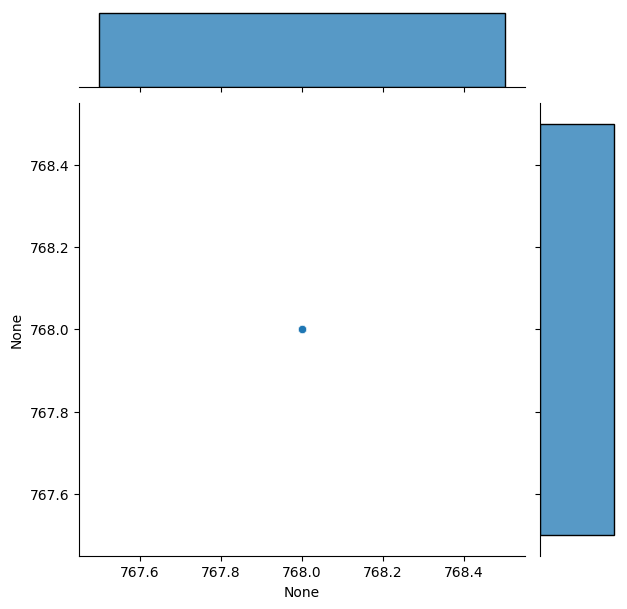

In [15]:
# checking if the picture sizes have any differences

dim1 = []
dim2 = []
for im in X:
    d1,d2,colors = im.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(x=dim1,y=dim2)  # shapes are similar thanks God

In [13]:
y = df['EncodedPixels'][:1000].notnull().apply(int).values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [18]:
X_train.shape

(700, 768, 768, 3)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train,2)

In [21]:
y_cat_test = to_categorical(y_test,2)

In [44]:
y_cat_test.shape

(300, 2)

In [23]:
x_train = X_train/255
x_test = X_test/255

In [43]:
x_train.shape

(700, 768, 768, 3)

In [29]:
image_shape = x_train[3].shape

In [30]:
image_shape

(768, 768, 3)

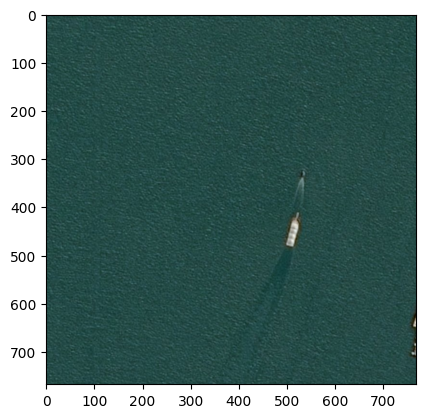

In [24]:
plt.imshow(x_train[3])

In [26]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
batch_size=16

In [39]:
# Check the Model before training
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 766, 766, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 383, 383, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 381, 381, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 190, 190, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 188, 188, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 94, 94, 64)       

# Training the Model

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
predictions[0]

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
my_image = x_test[1]

In [ ]:
plt.imshow(my_image)

In [ ]:
model.predict_classes(my_image.reshape(1,768,768,3))